### **TensorBoard Introduction using MNIST Handwritten Digits Classification**

* This notebook will demonstrate how to use TensorBoard to visualize the training process of a neural network. 

* We will train a model on the classic [MNIST dataset of handwritten digits](https://www.tensorflow.org/datasets/catalog/mnist), which is a perfect real-world example for beginners in computer vision and machine learning.

#### **What are Callbacks?**

* Before we begin, it is crucial to understand callbacks. 

* Callbacks are special functions in Keras that are executed at different stages of the training process, such as at the beginning or end of an epoch or a batch. 

* They are a powerful mechanism for customizing the behavior of your model during training without modifying the model's code itself.

* TensorBoard relies on a specific callback, `tf.keras.callbacks.TensorBoard`, to automatically log events and data that the tool can then visualize. 

* This callback enables you to track metrics like `loss` and `accuracy`, visualize the `model graph`, and even see how weights and biases change over time.

* The `TensorBoard` callback has several key parameters:

  * `log_dir`: Specifies the directory where the logs will be stored. It's a good practice to use a timestamped directory to organize different training runs.

  * `histogram_freq`: Controls how often to compute histograms of the model's weights, biases, and activations. Setting it to 1, for instance, will log these histograms every epoch.

  * `write_graph`: If set to `True`, it visualizes the model architecture in TensorBoard's "Graphs" tab.

  * `write_images`: If set to `True`, it can visualize model weights as images.

---

#### 1. Setup and Data Loading

* We'll start by importing the necessary libraries and loading the MNIST dataset. 

* The MNIST database contains 60,000 training images and 10,000 testing images of handwritten digits (0-9).

In [11]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Load the MNIST dataset and split into training and testing sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
# Display the shapes of the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, 'Label: 5')

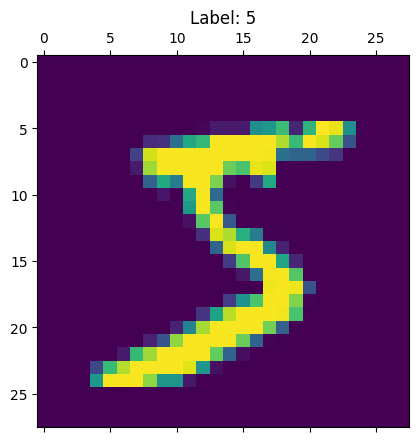

In [14]:
# Visualize the first training image and its label
plt.matshow(X_train[0])
plt.title(f"Label: {y_train[0]}")

#### 2. Data Preprocessing

* The MNIST images are `28x28` pixels with grayscale values from `0` to `255`. 

* We need to normalize these pixel values to be between `0` and `1` for optimal model performance. 

* We will also reshape the data to a `1D vector` (784 features) since our simple model expects a flat input.

In [15]:
# Data Preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to a 1D vector (784 features)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
# Display the shapes of the datasets after flattening
X_train_flattened.shape, y_train.shape, X_test_flattened.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

#### 3. Building the Neural Network Model

* We will create a simple `Sequential` model with one hidden layer. 

* The `Flatten` layer is a convenient way to automatically convert our 28x28 image input into a 1D array, eliminating the need for manual reshaping. 

* We'll then add a `Dense` hidden layer with 100 neurons and a final `Dense` output layer with 10 neurons, one for each digit class.

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#### 4. Compiling the Model and Setting up the TensorBoard Callback

* We compile the model with an `adam` optimizer and `sparse_categorical_crossentropy` loss. 

* We also define our `TensorBoard` callback, specifying the log directory and `histogram_freq=1` to log weight and bias distributions every epoch.

In [22]:
# Compiling the Model and Setting up the TensorBoard Callback
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define log directory for TensorBoard with timestamp
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up TensorBoard callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

#### 5. Training the Model with the TensorBoard Callback

* Finally, we train the model and pass our `tb_callback` to the `callbacks` argument of the `model.fit` method. 

* This will automatically generate the logs TensorBoard needs.

In [23]:
# Training the Model with the TensorBoard Callback and Logging
# Store training history in a variable for potential future use 
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9951 - loss: 0.0165 - val_accuracy: 0.9792 - val_loss: 0.0783
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9770 - val_loss: 0.0841
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0110 - val_accuracy: 0.9796 - val_loss: 0.0814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accuracy: 0.9781 - val_loss: 0.0873
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.9769 - val_loss: 0.0976


#### Summary

* Based on the training log, here are the key insights into the model's performance:

  * **Excellent Training Performance**: The model learns very effectively on the training data. 
    * The training accuracy starts high at 99.51% in the first epoch and steadily improves to 99.73% by the fifth epoch. 
    * Simultaneously, the training loss consistently decreases from 0.0165 to 0.0090, indicating the model is becoming increasingly confident and accurate on the data it has seen.

  * **Signs of Overfitting**: 
    * While the model performs exceptionally well on the training set, its performance on the validation set tells a different story. 
    * The validation accuracy is high (around 97.7% - 97.9%) but does not show a clear upward trend. 
    * More importantly, the validation loss increases consistently from 0.0783 in the first epoch to 0.0976 in the final epoch.
    * The combination of decreasing training loss and increasing validation loss is a classic indicator of overfitting. 

* The model is starting to memorize the training data rather than learning to generalize to new, unseen examples. 

* This suggests that further training beyond the fifth epoch might not improve the model's ability to classify new digits and could even degrade its performance on the validation set. 

#### 6. Launching TensorBoard

* After training, you can launch TensorBoard to view the visualizations. 

* If you are in a Jupyter Notebook or Google Colab, you can use the magic command below. 

* Alternatively, you can run `tensorboard --logdir logs/fit` from your terminal.

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Launch TensorBoard and point it to the log directory
%tensorboard --logdir logs/fit

---


*Deep Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)